1. Lectura del archivo. 

In [ ]:
import pandas as pd

# Path 
file_path = r"C:\Users\param\OneDrive\Escritorio\Programacion\Soy Henry\Proyecto-sentimientos\DATASET\df_fast_food_google.csv"

# Lectura
df_fast_food = pd.read_csv(file_path, encoding="utf-8-sig")

2. Observemos una correlación inicial

                       vader_compound_google    rating  avg_rating  \
vader_compound_google               1.000000  0.572861    0.270919   
rating                              0.572861  1.000000    0.326396   
avg_rating                          0.270919  0.326396    1.000000   
num_of_reviews                     -0.016008  0.027859    0.158774   
MedianHH_Income                     0.026790  0.011234    0.072055   
Median_Home_Value                   0.018692 -0.008257    0.015130   
Median_RE_Taxes                     0.012362 -0.017458   -0.002603   
drive-through                      -0.134218 -0.056664   -0.153347   
curbside pickup                    -0.039717 -0.014939   -0.004514   
takeout                             0.076159  0.030360    0.058211   
delivery                           -0.028338 -0.017178   -0.024668   
cozy                                0.095062  0.067366    0.177988   
casual                              0.007540  0.002651    0.053156   
college students    

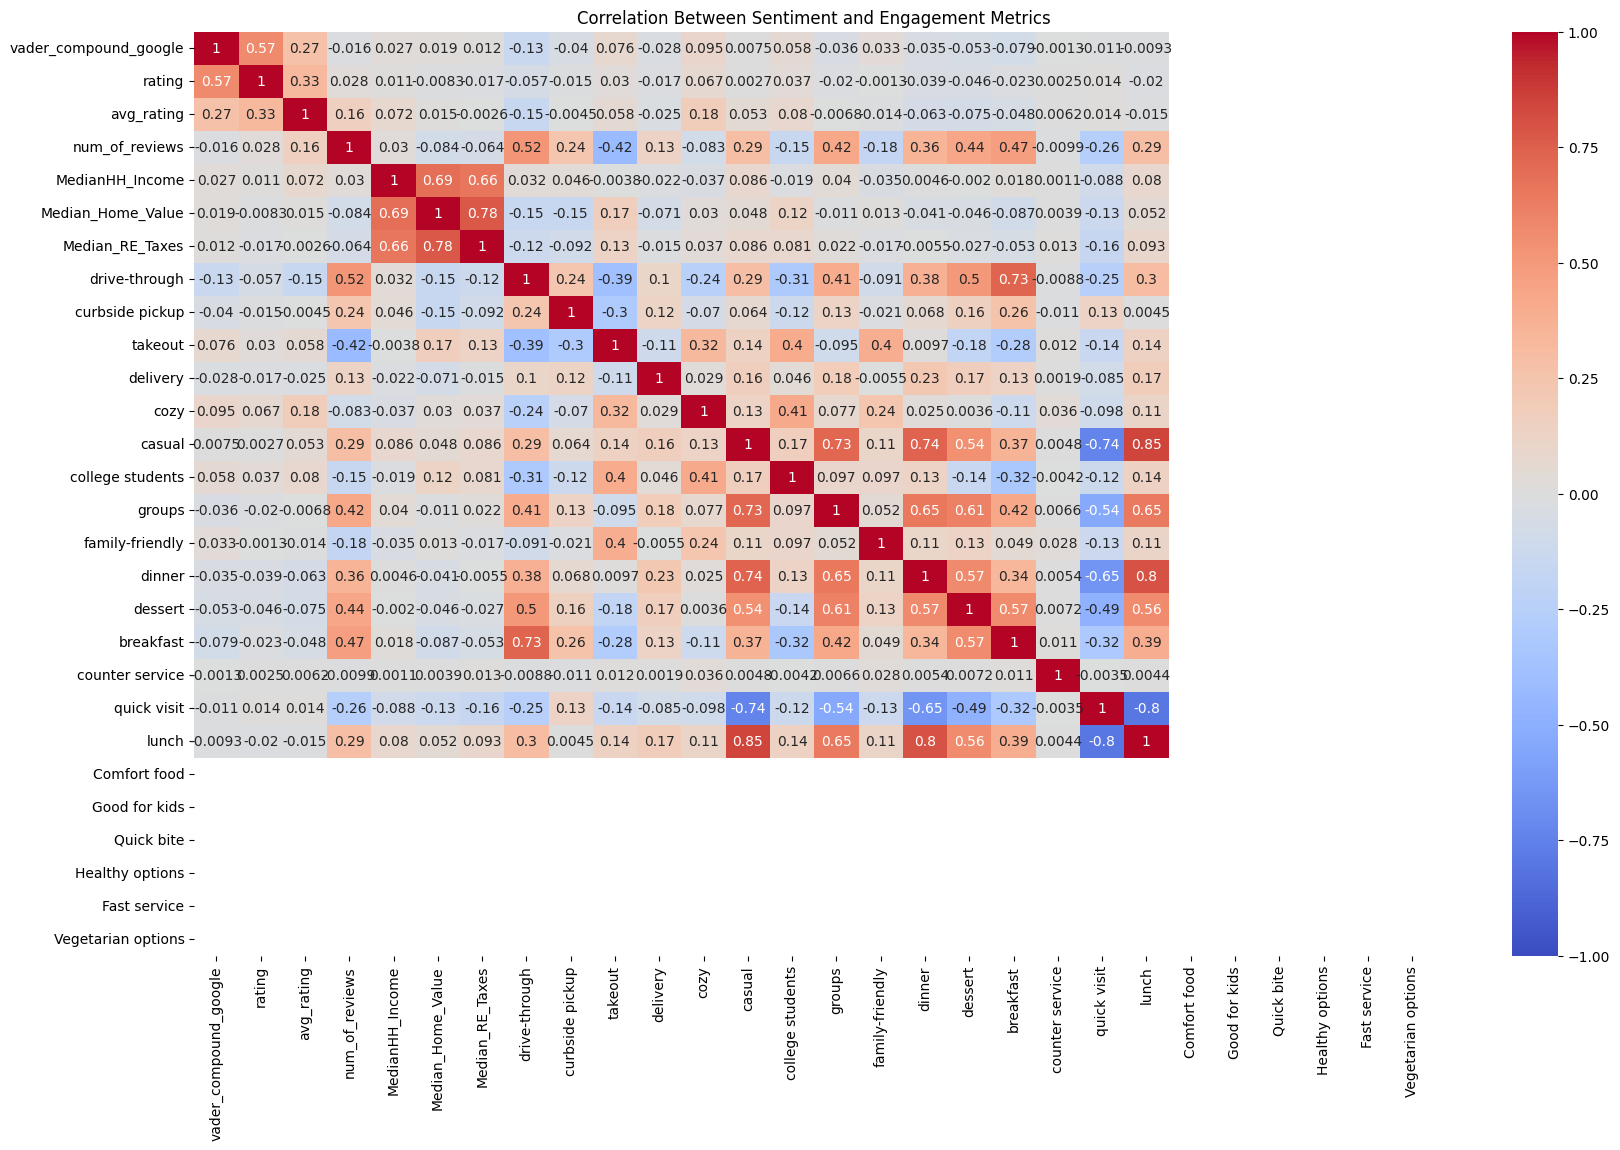

In [27]:
#Creamos heat map entre las variables relevantes.
corr_matrix = df_fast_food[['vader_compound_google','rating', 'avg_rating', 'num_of_reviews', 'MedianHH_Income', 'Median_Home_Value',
       'Median_RE_Taxes', 'drive-through', 'curbside pickup', 'takeout',
       'delivery', 'cozy', 'casual', 'college students', 'groups',
       'family-friendly', 'dinner', 'dessert', 'breakfast', 'counter service',
       'quick visit', 'lunch', 'Comfort food', 'Good for kids', 'Quick bite',
       'Healthy options', 'Fast service', 'Vegetarian options']].corr()
print(corr_matrix)

# Heatmap visualization
import seaborn as sns

# Set larger figure size
plt.figure(figsize=(20, 12))  # width=16, height=12 in inches

sns.heatmap(
    corr_matrix, 
    annot=True, 
    cmap='coolwarm', 
    vmin=-1,  # Fix scale minimum to -1
    vmax=1,   # Fix scale maximum to +1
    center=0  # Ensure white is at zero
)
plt.title("Correlation Between Sentiment and Engagement Metrics")
plt.show()


*** Apare poca correlación entre Vader_compund y las dummies.

3. Creamos un árbol decision con todas las variables iniciales

In [31]:
# Las variables explicativas- solo numericas o dummies
feature_cols = ['rating', 'avg_rating', 'num_of_reviews', 'MedianHH_Income', 'Median_Home_Value',
       'Median_RE_Taxes', 'drive-through', 'curbside pickup', 'takeout',
       'delivery', 'cozy', 'casual', 'college students', 'groups',
       'family-friendly', 'dinner', 'dessert', 'breakfast', 'counter service',
       'quick visit', 'lunch', 'Comfort food', 'Good for kids', 'Quick bite',
       'Healthy options', 'Fast service', 'Vegetarian options']

X = df_fast_food[feature_cols]
y = df_fast_food['vader_sentiment_google']

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [33]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=4, random_state=42)  # Puedes ajustar max_depth
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [34]:
#Validamos el modelo
from sklearn.metrics import accuracy_score, classification_report

y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7896453322462291
              precision    recall  f1-score   support

    Negative       0.49      0.55      0.51       980
     Neutral       1.00      0.00      0.00      1281
    Positive       0.83      0.96      0.89      7551

    accuracy                           0.79      9812
   macro avg       0.77      0.50      0.47      9812
weighted avg       0.82      0.79      0.73      9812



4. Creamos un árbol decisión con las variables más relevantes del heatmap.

In [56]:
# Las variables explicativas- solo numericas o dummies
feature_cols = ['rating', 'avg_rating']

X = df_fast_food[feature_cols]
y = df_fast_food['vader_sentiment_google']

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [58]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=4, random_state=42)  # Puedes ajustar max_depth
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [59]:
#Validamos el modelo
from sklearn.metrics import accuracy_score, classification_report

y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7899510803098247
              precision    recall  f1-score   support

    Negative       0.52      0.47      0.49       980
     Neutral       0.00      0.00      0.00      1281
    Positive       0.82      0.97      0.89      7551

    accuracy                           0.79      9812
   macro avg       0.44      0.48      0.46      9812
weighted avg       0.68      0.79      0.73      9812



c:\Users\param\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\param\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\param\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [62]:
from sklearn.ensemble import RandomForestClassifier
#Creamos el random forest
rf = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, random_state=42)

In [63]:
#Validamos el modelo
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7906644924582145
              precision    recall  f1-score   support

    Negative       0.50      0.51      0.50       980
     Neutral       0.00      0.00      0.00      1281
    Positive       0.82      0.96      0.89      7551

    accuracy                           0.79      9812
   macro avg       0.44      0.49      0.46      9812
weighted avg       0.68      0.79      0.73      9812



c:\Users\param\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\param\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\param\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

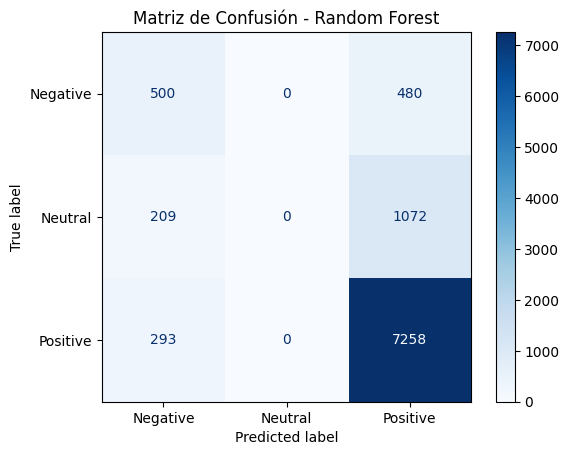

In [64]:
#Matriz confusion random forest
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap='Blues')
plt.title('Matriz de Confusión - Random Forest')
plt.show()


Obtenemos el mismo resultado sólo usando dos variables: rating y average rating. Pongamos la opcion de balanceo en el arbol de decisión. Hay muy pocos datos de la parte negativa y eso puede generar un problema.

5. Resampleo con SMOTE

In [49]:
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score


In [50]:
# Las variables explicativas- solo numericas o dummies
feature_cols = ['rating', 'avg_rating', 'num_of_reviews', 'MedianHH_Income', 'Median_Home_Value',
       'Median_RE_Taxes', 'drive-through', 'curbside pickup', 'takeout',
       'delivery', 'cozy', 'casual', 'college students', 'groups',
       'family-friendly', 'dinner', 'dessert', 'breakfast', 'counter service',
       'quick visit', 'lunch', 'Comfort food', 'Good for kids', 'Quick bite',
       'Healthy options', 'Fast service', 'Vegetarian options']

X = df_fast_food[feature_cols]
y = df_fast_food['vader_sentiment_google']

In [51]:
# Assuming you already have X (features) and y (labels)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [52]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())


Before SMOTE: vader_sentiment_google
Positive    26371
Neutral      4461
Negative     3509
Name: count, dtype: int64
After SMOTE: vader_sentiment_google
Positive    26371
Neutral     26371
Negative    26371
Name: count, dtype: int64


In [53]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_res, y_train_res)


DecisionTreeClassifier(random_state=42)

In [54]:
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.6377904606604158
              precision    recall  f1-score   support

    Negative       0.38      0.64      0.48      1504
     Neutral       0.18      0.32      0.23      1912
    Positive       0.89      0.69      0.78     11302

    accuracy                           0.64     14718
   macro avg       0.48      0.55      0.50     14718
weighted avg       0.74      0.64      0.68     14718



Conclusión- no mejoró con el resampleo. 
Para explicar el sentimiento de los comentarios basta con la variable rating y average rating.

6. Tomar sólo los comentarios negativos y poner cuales son las palabras que más se repiten.

In [68]:
df_negative = df_fast_food[df_fast_food["vader_compound_google"] < 0]

In [69]:
#Esta libreria busca temas como "too slow", "dirty tables", etc
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

vectorizer = TfidfVectorizer(stop_words='english',ngram_range=(1, 2))
X = vectorizer.fit_transform(df_negative['text'])

kmeans = KMeans(n_clusters=6, random_state=42)
df_negative['cluster'] = kmeans.fit_predict(X)

c:\Users\param\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\param\AppData\Local\Temp\ipykernel_11304\1382652544.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_negative['cluster'] = kmeans.fit_predict(X)


In [70]:

# Obtenemos los términos (palabras o frases)
terms = vectorizer.get_feature_names_out()

# Mostramos los 10 términos más importantes por cada clúster
num_top_words = 10

for i in range(kmeans.n_clusters):
    print(f"\nTop palabras para clúster {i}:")
    # Para cada clúster, ordenamos las features según su importancia (centroide)
    top_indices = kmeans.cluster_centers_[i].argsort()[::-1][:num_top_words]
    top_terms = [terms[ind] for ind in top_indices]
    print(", ".join(top_terms))



Top palabras para clúster 0:
terrible, service, poor, terrible service, poor service, service terrible, food, customer service, food terrible, service poor

Top palabras para clúster 1:
bad, bad service, service, food bad, bad customer, bad experience, customer service, food, good bad, bad place

Top palabras para clúster 2:
horrible, nasty, service horrible, horrible food, service, food, horrible service, food horrible, horrible customer, nasty food

Top palabras para clúster 3:
dirty, place, dirty place, table, place dirty, bathroom, table dirty, nasty, dirty table, food

Top palabras para clúster 4:
food, service, bad, rude, place, dont, like, time, good, worst

Top palabras para clúster 5:
order, wrong, order wrong, suck, messed, time, messed order, got, wrong order, food


Conclusión- Para explicar los sentimientos de las reseñas, hay una alta correlación con el rating y el promedio de rating. De la variable MISC, cuando creamos las dummies, no se pudo encontrar algo explicativo...

Usando de clustering para las reseñas encontramos los siguientes problemas:

1. Mal servicio: customer service- errores de orden y suciedad.
2. Mala comida.